**Questão 1:** Os alunos de uma universidade adoram um jogo que consiste em um tabuleiro com peças brancas e pretas.
O objetivo do jogo é tornar todas as peças pretas. A única operação possı́vel é a de selecionar uma peça, que terá
a sua cor invertida. Esta operação, no entanto, inverte também as cores das peças adjacentes (acima, abaixo e aos
lados – sem modificar as peças vizinhas nas diagonais).

A saı́da do seu programa deve ser uma matriz X, também de dimensão m × n, tal que xij = 1 se esta peça for
selecionada para inversão de cores ou xij = 0 caso contrário. Teste seu programa com alguns exemplos. Este
problema sempre tem solução?

**Resposta:**

Eu modelei o problema da seguinte forma: 

\begin{align*}
\text{Minimize} \quad & \sum_{i=1}^{m} \sum_{j=1}^{n} x_{i,j} \\
\text{sujeito a} \quad & c_{i,j} = x_{i,j} + s_{i,j} + \sum_{(i',j') \in \mathcal{N}(i,j)} x_{i',j'}, \quad \forall i,j \\
& c_{i,j} - 2k_{i,j} = 0, \quad \forall i,j \\
& x_{i,j} \in \{0,1\}, \quad \forall i,j \\
& k_{i,j} \in \mathbb{Z}^+, \quad \forall i,j \\
& c_{i,j} \in \mathbb{Z}^+, \quad \forall i,j
\end{align*}

- $x_{i,j}$ é uma variável binária que indica se uma ação é tomada na posição $(i,j)$
- $s_{i,j}$ é o estado inicial na posição $(i,j)$
- $c_{i,j}$ é a soma cumulativa dos valores na posição $(i,j)$ e seus vizinhos
- $k_{i,j}$ é uma variável inteira que representa metade do valor cumulativo
- $\mathcal{N}(i,j)$ denota os vizinhos válidos da posição $(i,j)$ (acima, abaixo, esquerda e direita)

Eu procurei bastante e não consegui achar se esse problema sempre tem solução ou não, como estamos tentando satifazer um conjunto de equações lineares, podemos representar o problema todo como a multiplicação de um vetor por uma matriz em um corpo de galois de caracteristica 2 (por conta do mod 2), então descobrir se sempre há solução é uma questão dessa matriz ser invertível ou não. Não cheguei a conseguir fazer essas contas para resolver o problema, mas achei um buraco de minhoca muito interessante procurando esse assunto em sua formulação original de "lights out". Cai em várias questões algébricas o problema generalizado, por exemplo eu gostei muito dessa referência aqui: https://peterefrancis.com/lights-out-algebra/

In [28]:
"""
   Código do professor
"""
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def imprimir(_M,jogada) :
    [m,n] = _M.shape
    #C = colormap([1 1 1; 0 0 0; 0 1 0]
    fig, ax = plt.subplots()
    i = ax.imshow(_M, interpolation='nearest', cmap=cm.BuPu, vmin=0, vmax=2)
    #fig.colorbar(i)
    print("Jogada ",str(jogada)) 
    plt.show()

def inverter(val) :
    if val == 0 :
        return 1
    if val == 1 :
        return  0

def tabuleiro(_X,_M) :
    [m,n] = _M.shape
    iv = np.arange(0,m)
    random.shuffle(iv)
    jv = np.arange(0,n)
    random.shuffle(jv) 
    jogada=0
    for i in iv  :
        for j in jv :
            if _X[i,j] == 1 :      
                jogada = jogada + 1                    
                _M[i,j] = _M[i,j] + 2
                imprimir(_M, jogada)
                if i > 0 :
                    _M[i-1,j] = inverter(_M[i-1,j])
                if i < m-1 :
                    _M[i+1,j] = inverter(_M[i+1,j])
                if j > 0 :
                    _M[i,j-1] = inverter(_M[i,j-1])
                if j < n-1 :                
                    _M[i,j+1] = inverter(_M[i,j+1])
                _M[i,j] = _M[i,j] - 2
                _M[i,j] = inverter(_M[i,j])    
                imprimir(_M, jogada)
    
 
    return _M   

In [29]:
import numpy as np 
import cvxpy as cp 

def solve_game(initial_state):
    x = cp.Variable(initial_state.shape, boolean=True, name='x')
    cummulative = cp.Variable(initial_state.shape, integer=True, name='c')
    k = cp.Variable(initial_state.shape, integer=True, name='k')
    constraints = []
    rows = initial_state.shape[0]
    columns = initial_state.shape[1]

    for i in range(rows):
        for j in range(columns):
            # Essa parte lida com a beiradinhas melhor
            top = x[i-1,j] if i-1 >= 0 else 0
            bottom = x[i+1,j] if i+1 < rows else 0
            left = x[i][j-1] if j-1 >= 0 else 0
            right = x[i][j+1] if j+1 < columns else 0

            constraints.append(cummulative[i,j] == x[i,j] + initial_state[i,j] \
                               + top + bottom \
                               + left + right)
            
            constraints.append(cummulative[i,j] - 2*k[i,j] == 0)

    objective = cp.Minimize(cp.sum(x))
    # Resolve o problema
    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.SCIP) 

    print(problem.status)
    print("Solução de cliques:")
    print(x.value)

    return x.value

### Exemplos

Puzzle original:
[[1 0 0 0 1]
 [0 1 0 1 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 1 0 1 0]
 [1 0 0 0 1]]
optimal
Solução de cliques:
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Jogada  1


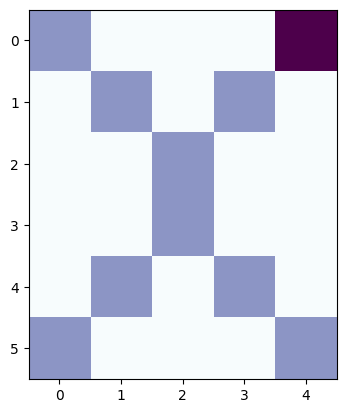

Jogada  1


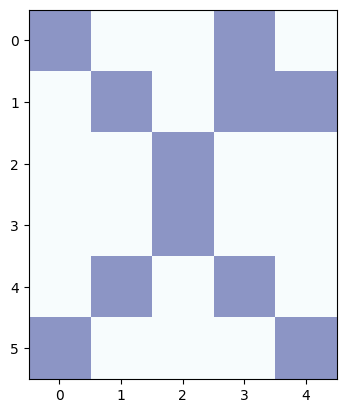

Jogada  2


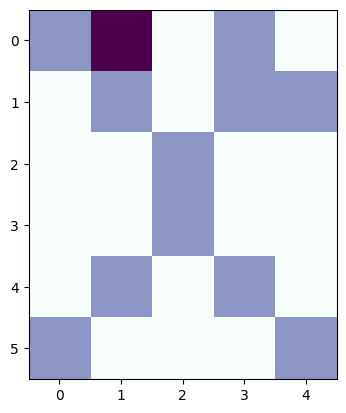

Jogada  2


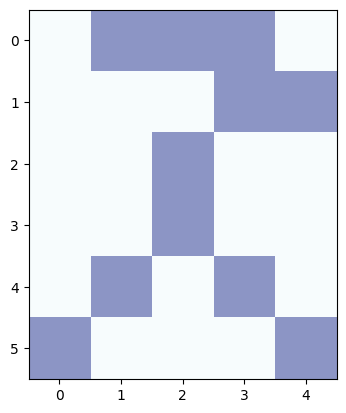

Jogada  3


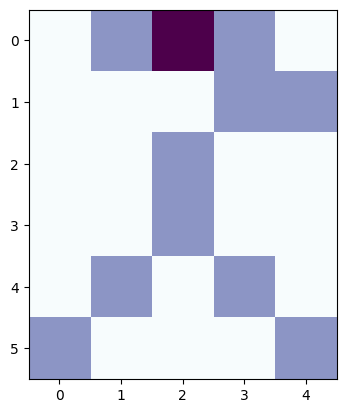

Jogada  3


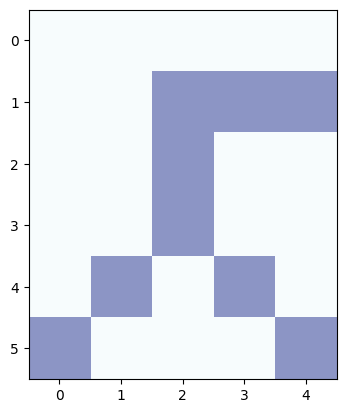

Jogada  4


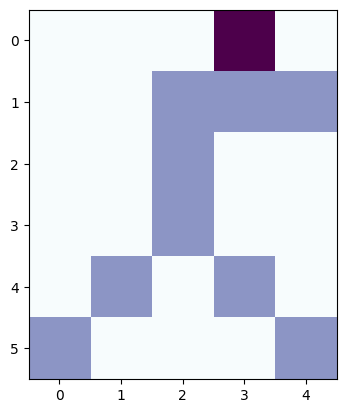

Jogada  4


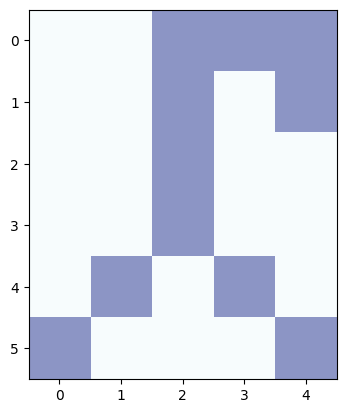

Jogada  5


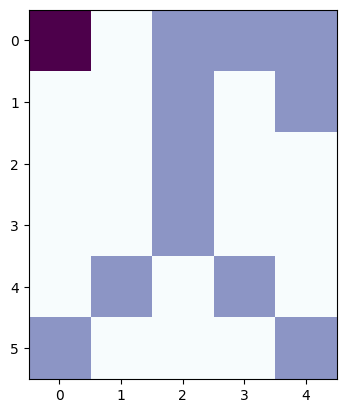

Jogada  5


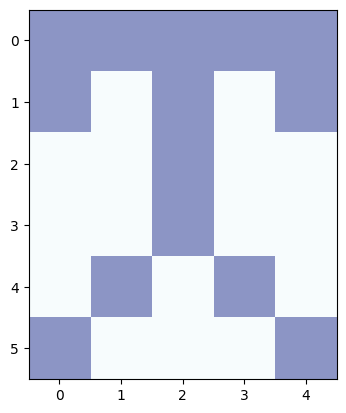

Jogada  6


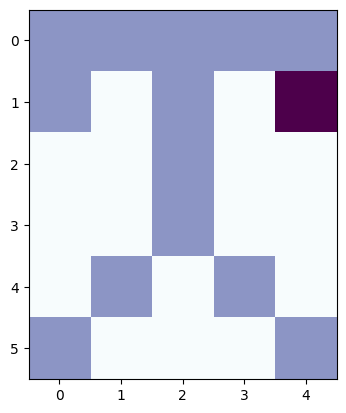

Jogada  6


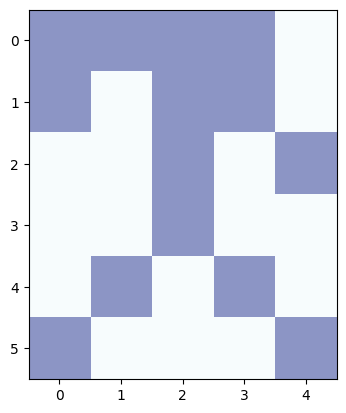

Jogada  7


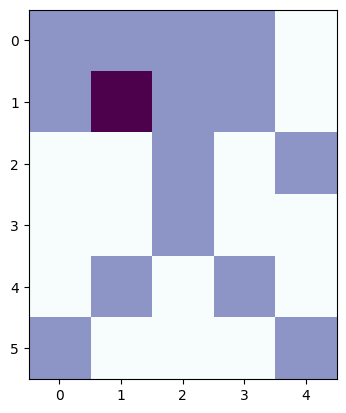

Jogada  7


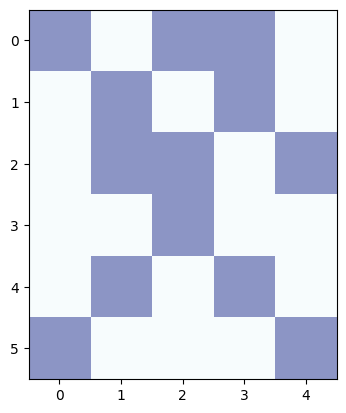

Jogada  8


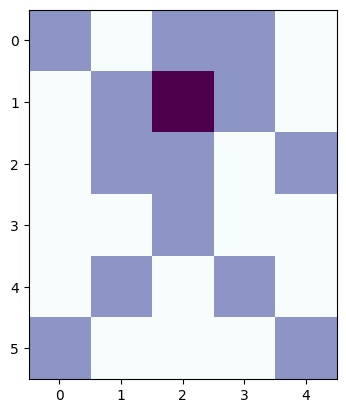

Jogada  8


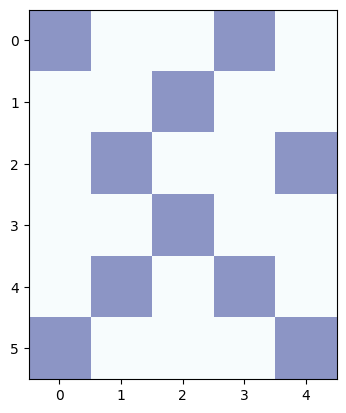

Jogada  9


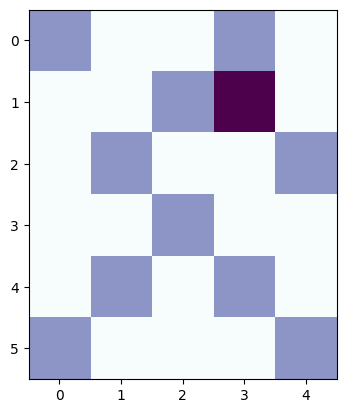

Jogada  9


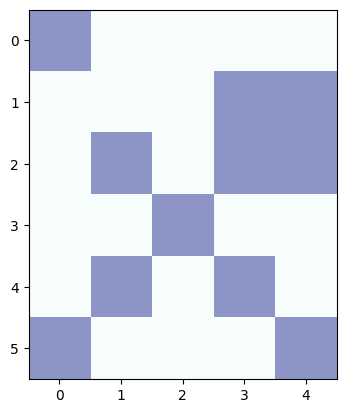

Jogada  10


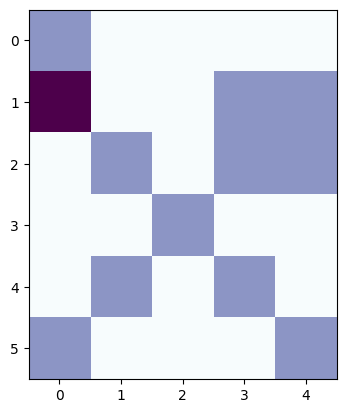

Jogada  10


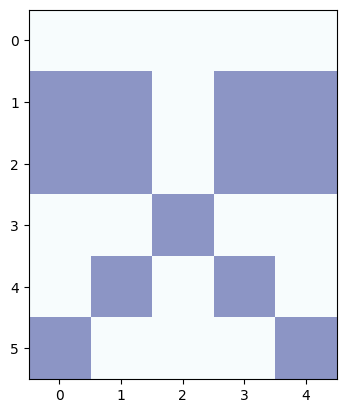

Jogada  11


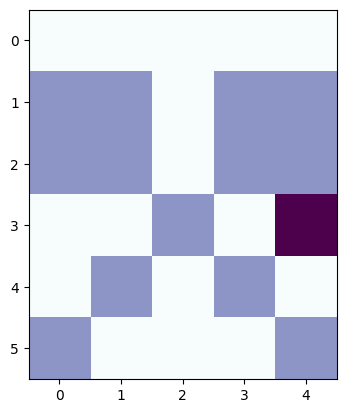

Jogada  11


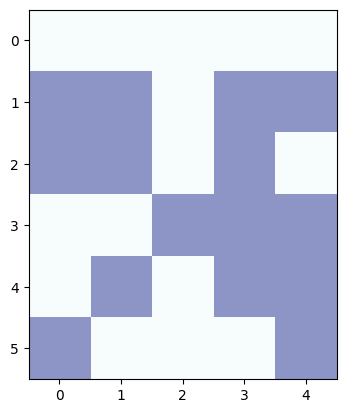

Jogada  12


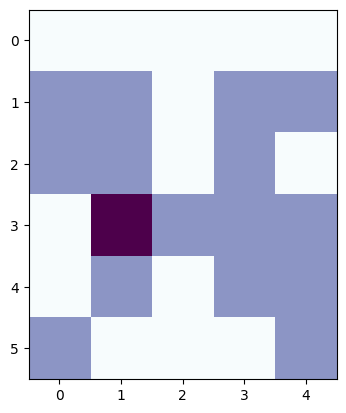

Jogada  12


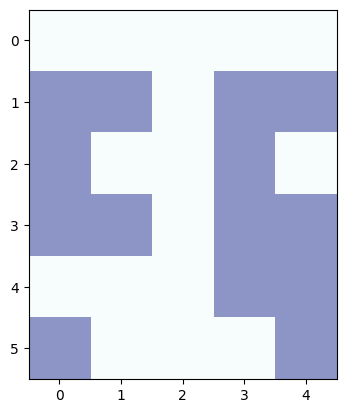

Jogada  13


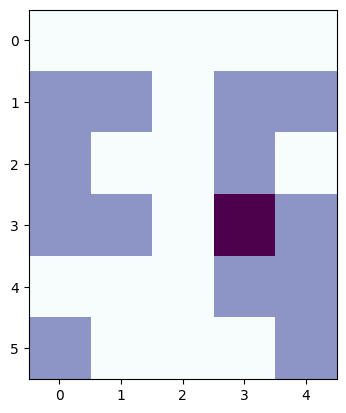

Jogada  13


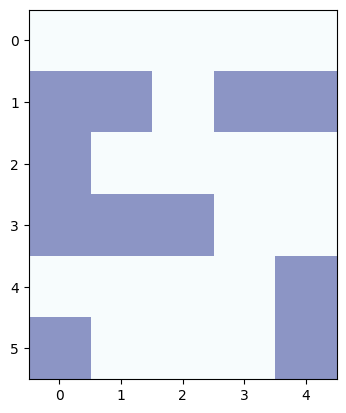

Jogada  14


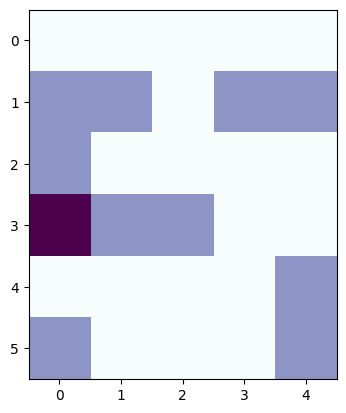

Jogada  14


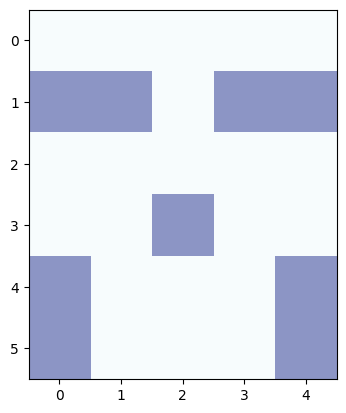

Jogada  15


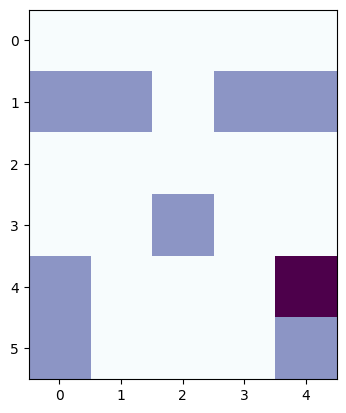

Jogada  15


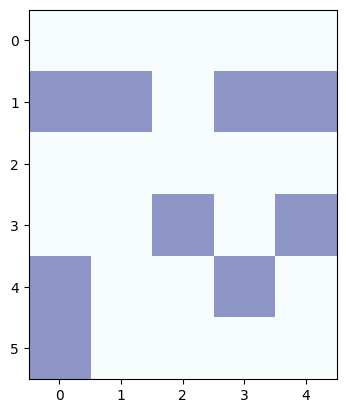

Jogada  16


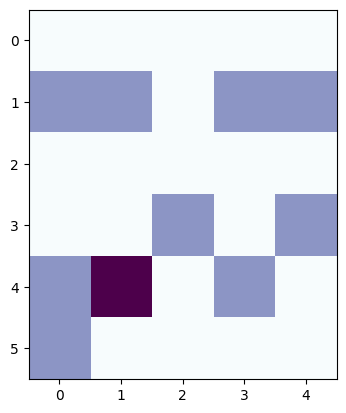

Jogada  16


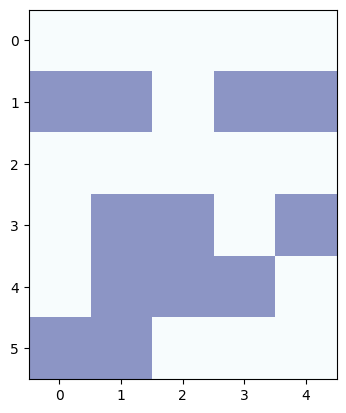

Jogada  17


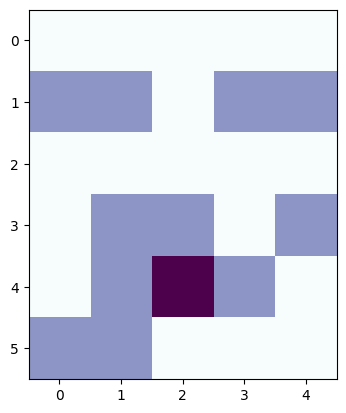

Jogada  17


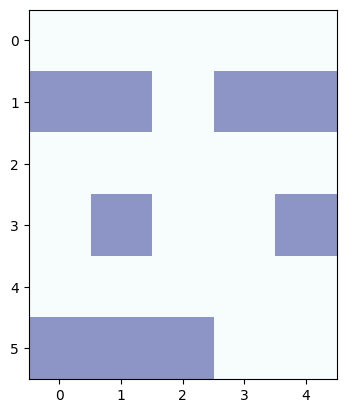

Jogada  18


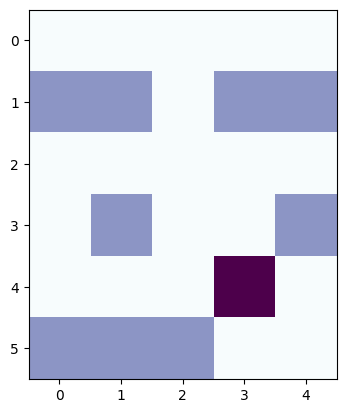

Jogada  18


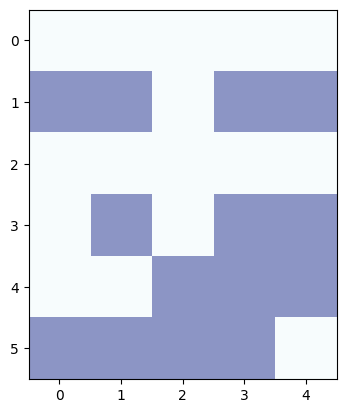

Jogada  19


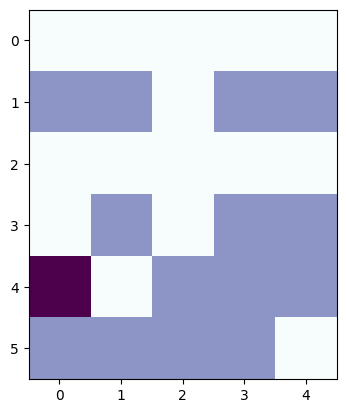

Jogada  19


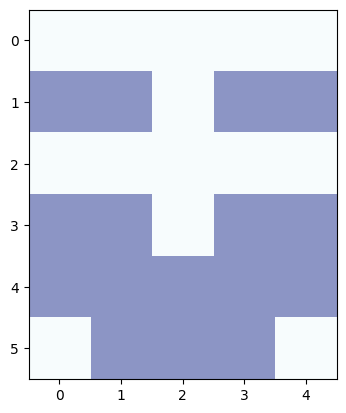

Jogada  20


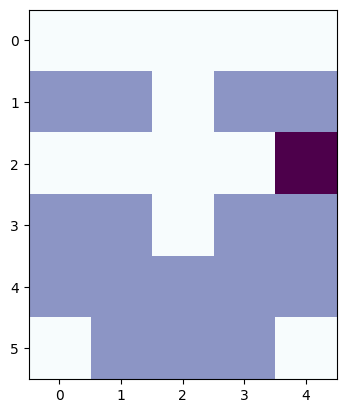

Jogada  20


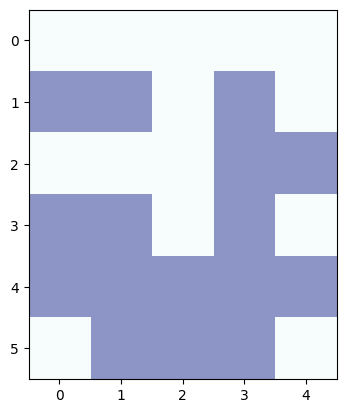

Jogada  21


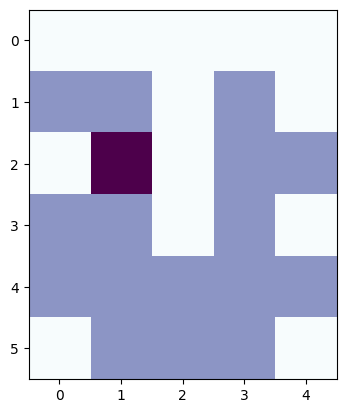

Jogada  21


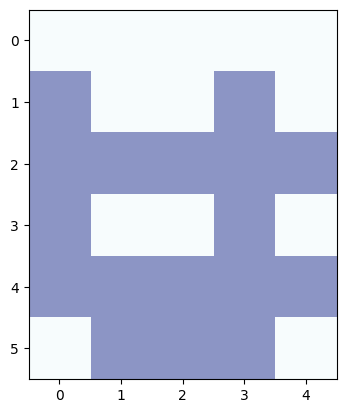

Jogada  22


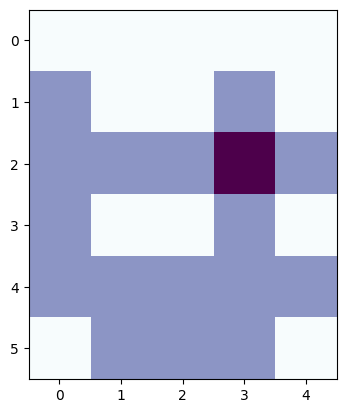

Jogada  22


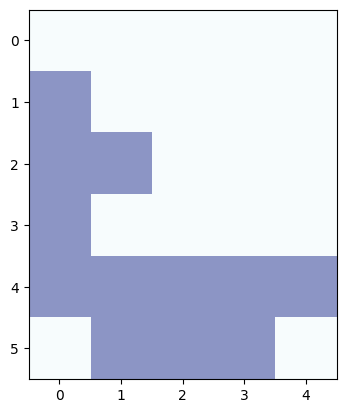

Jogada  23


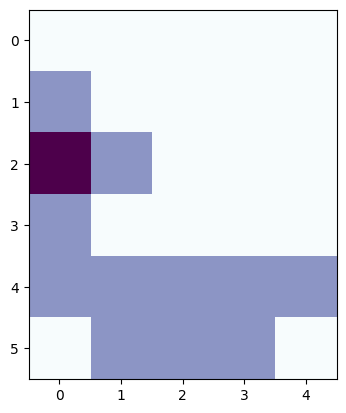

Jogada  23


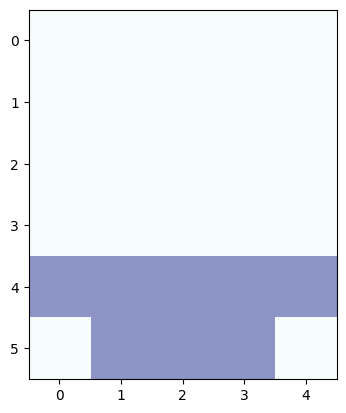

Jogada  24


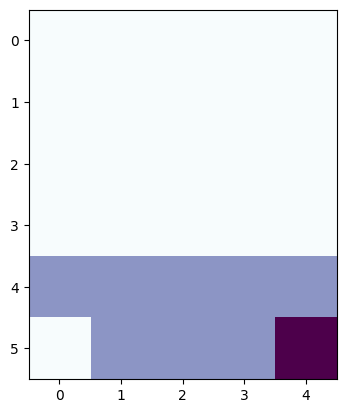

Jogada  24


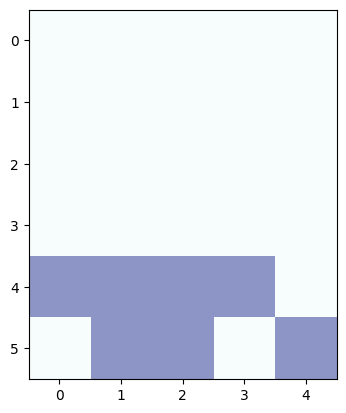

Jogada  25


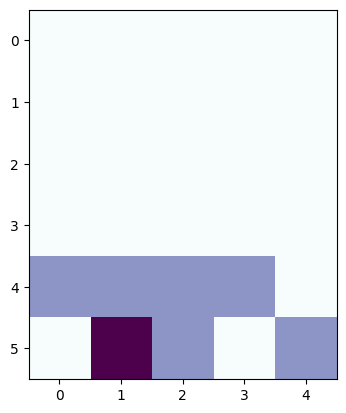

Jogada  25


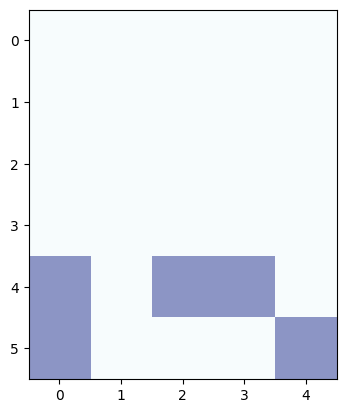

Jogada  26


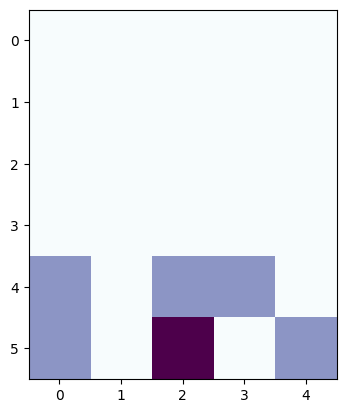

Jogada  26


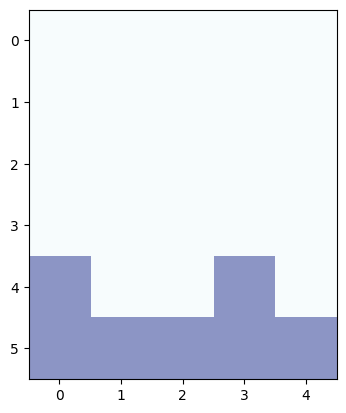

Jogada  27


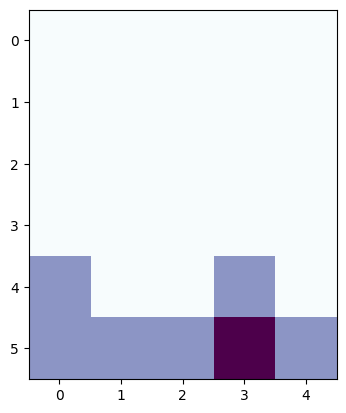

Jogada  27


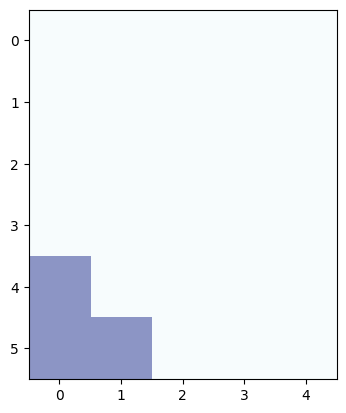

Jogada  28


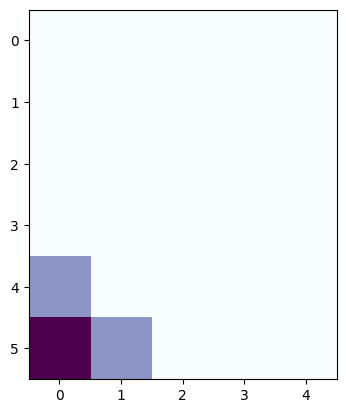

Jogada  28


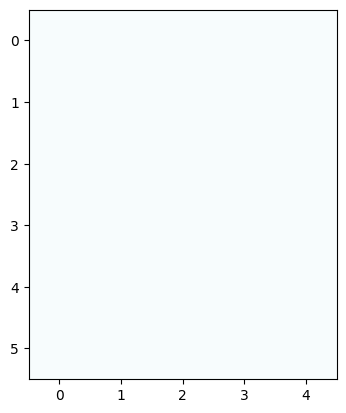

In [30]:
if __name__ == '__main__':

    puzzle = np.array([
        [1,0,0,0,1],
        [0,1,0,1,0],
        [0,0,1,0,0],
        [0,0,1,0,0],
        [0,1,0,1,0],
        [1,0,0,0,1]
    ])
    
    print("Puzzle original:")
    print(puzzle)
    
    solution = solve_game(puzzle)

    tabuleiro(solution, puzzle)

Puzzle original:
[[1 0 1 1 1]
 [1 0 1 0 1]
 [0 0 1 0 0]
 [1 0 0 1 1]
 [0 1 0 1 0]
 [1 1 0 1 0]]
optimal
Solução de cliques:
[[1. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1.]
 [0. 1. 1. 0. 1.]
 [0. 1. 1. 0. 0.]
 [0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0.]]
Jogada  1


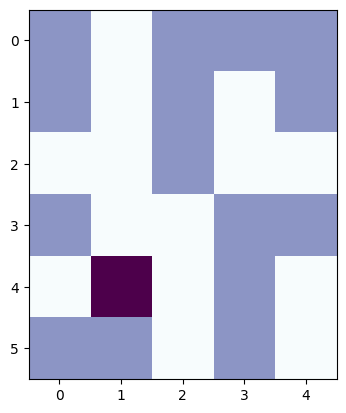

Jogada  1


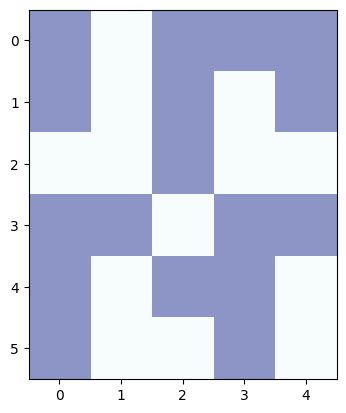

Jogada  2


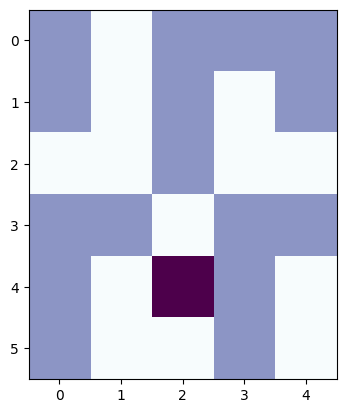

Jogada  2


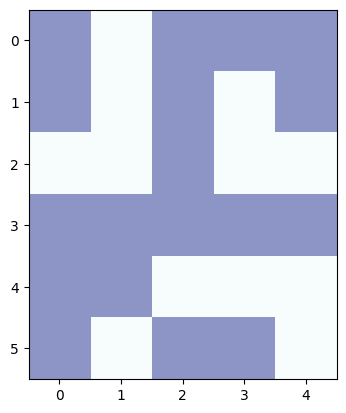

Jogada  3


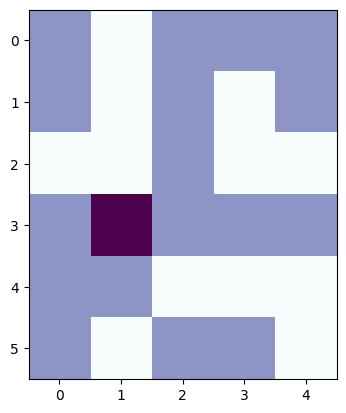

Jogada  3


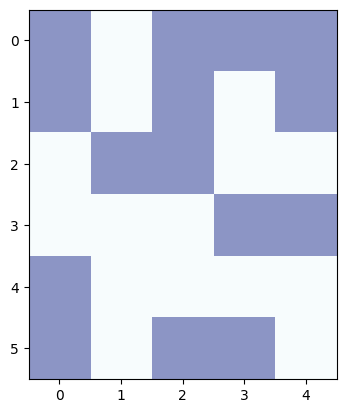

Jogada  4


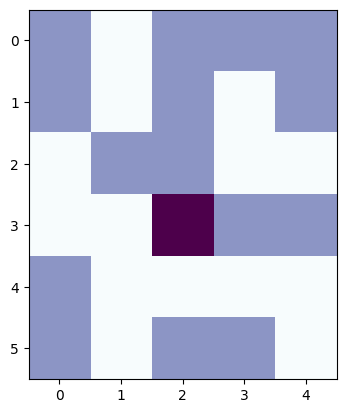

Jogada  4


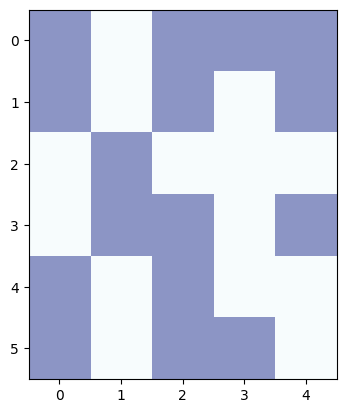

Jogada  5


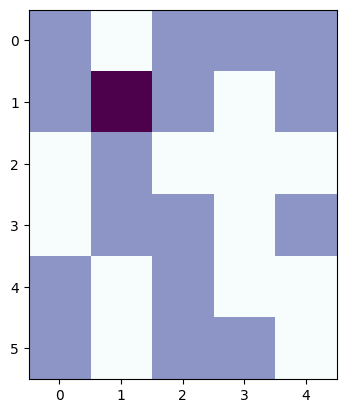

Jogada  5


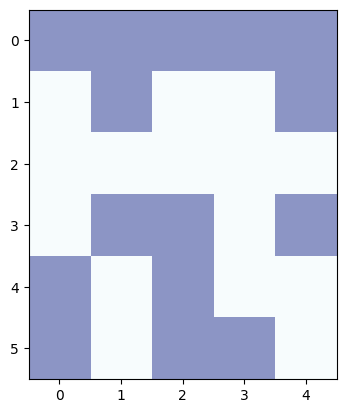

Jogada  6


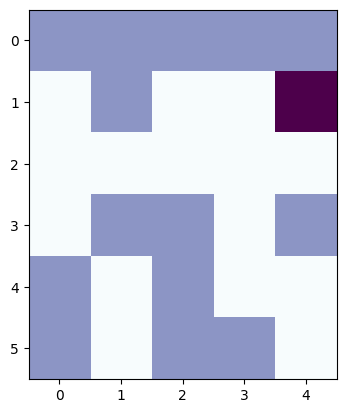

Jogada  6


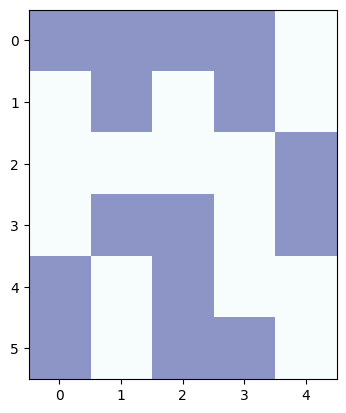

Jogada  7


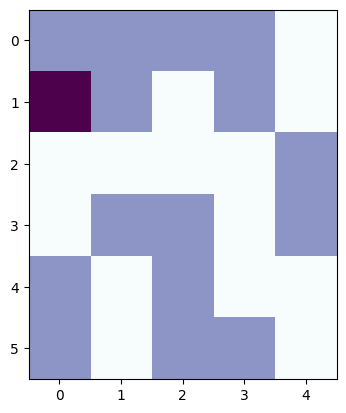

Jogada  7


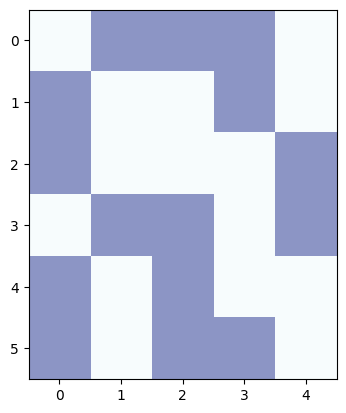

Jogada  8


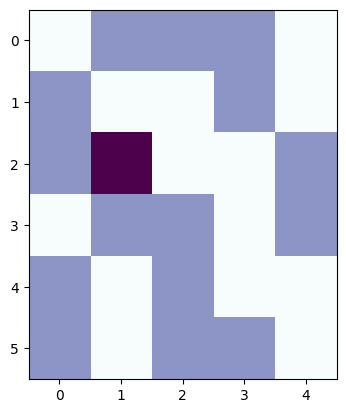

Jogada  8


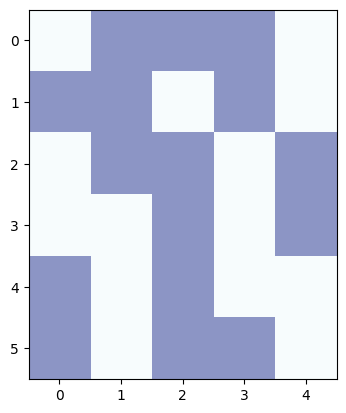

Jogada  9


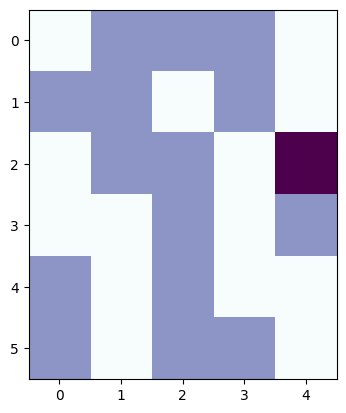

Jogada  9


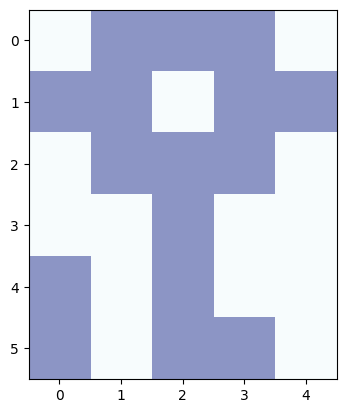

Jogada  10


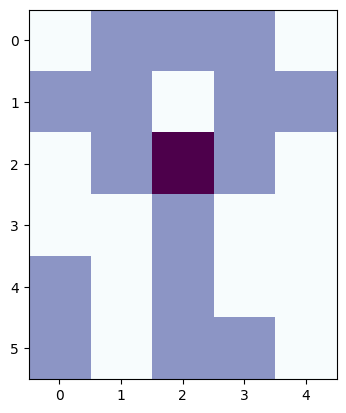

Jogada  10


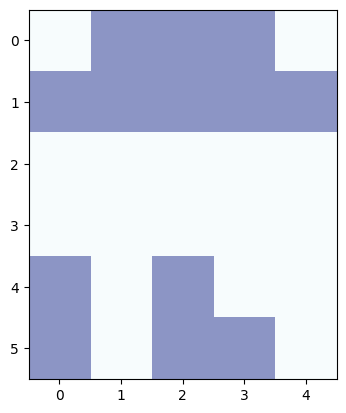

Jogada  11


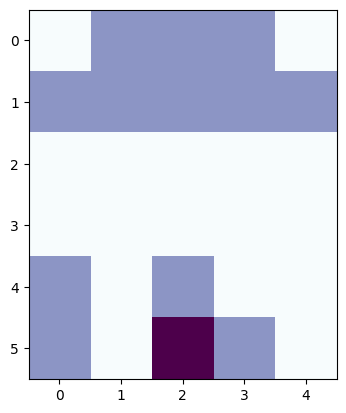

Jogada  11


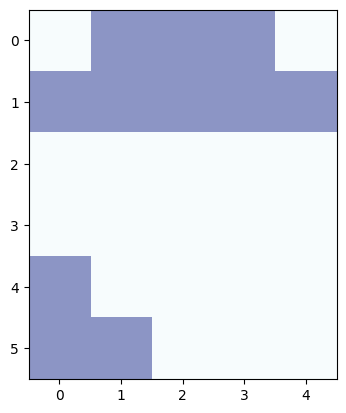

Jogada  12


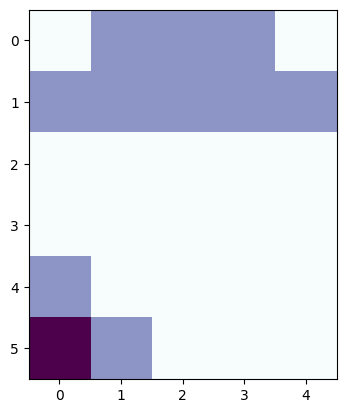

Jogada  12


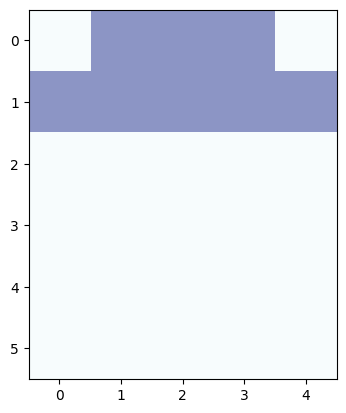

Jogada  13


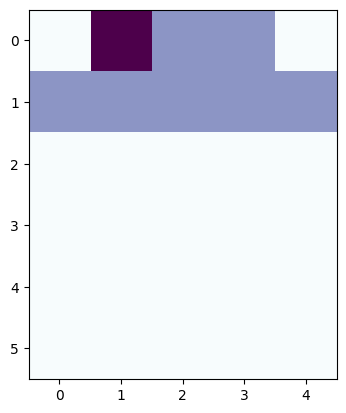

Jogada  13


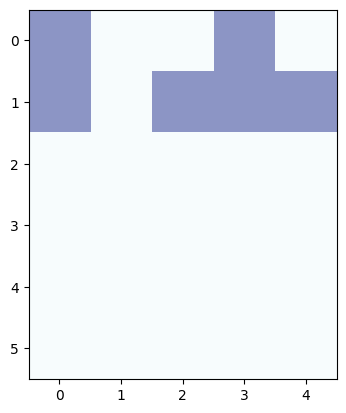

Jogada  14


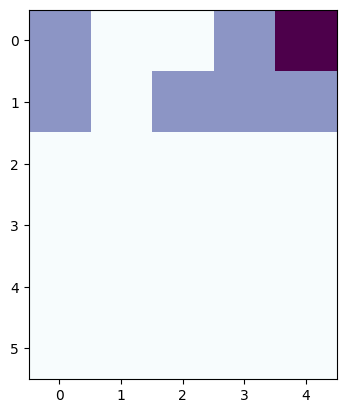

Jogada  14


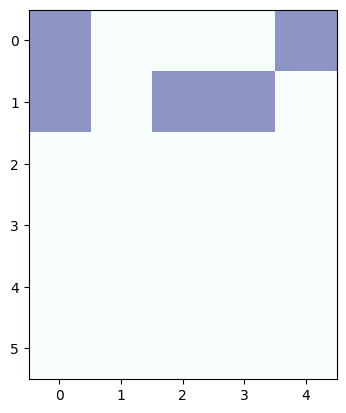

Jogada  15


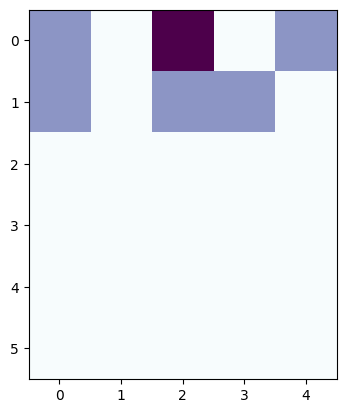

Jogada  15


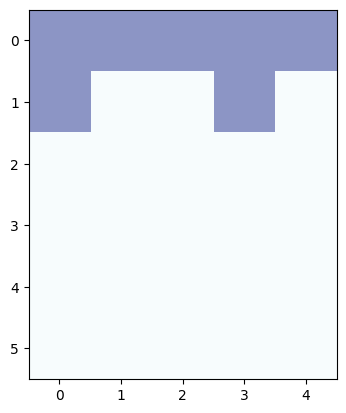

Jogada  16


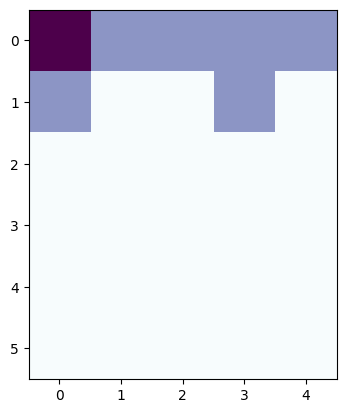

Jogada  16


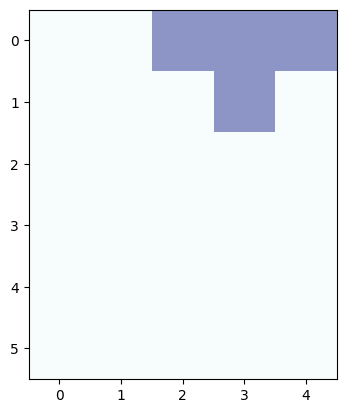

Jogada  17


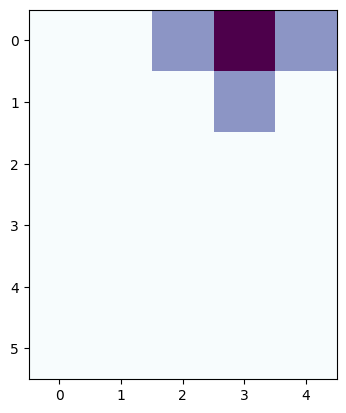

Jogada  17


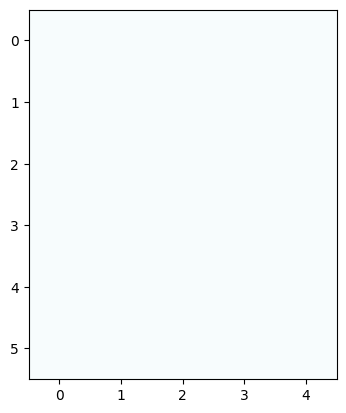

In [23]:
if __name__ == '__main__':
    
    puzzle = np.array([
        [1,0,1,1,1],
        [1,0,1,0,1],
        [0,0,1,0,0],
        [1,0,0,1,1],
        [0,1,0,1,0],
        [1,1,0,1,0]
    ])
    
    print("Puzzle original:")
    print(puzzle)
    
    solution = solve_game(puzzle)

    tabuleiro(solution, puzzle)

Puzzle original:
[[0 0 1 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
optimal
Solução de cliques:
[[1. 1. 1. 1. 1.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [1. 1. 0. 1. 1.]
 [0. 1. 0. 1. 0.]]
Jogada  1


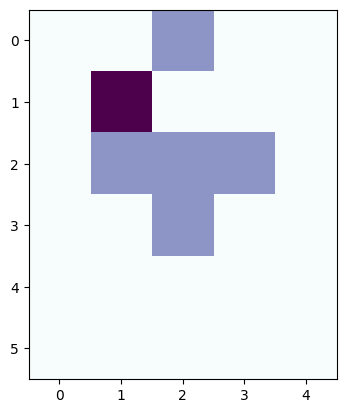

Jogada  1


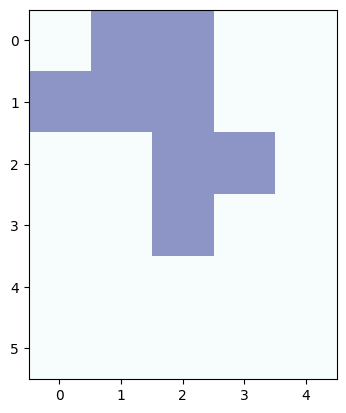

Jogada  2


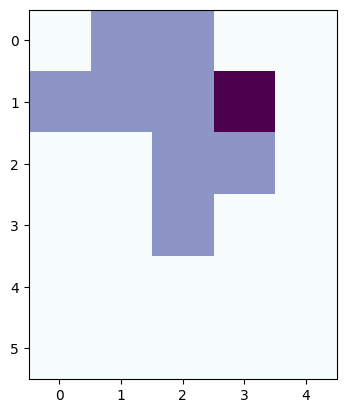

Jogada  2


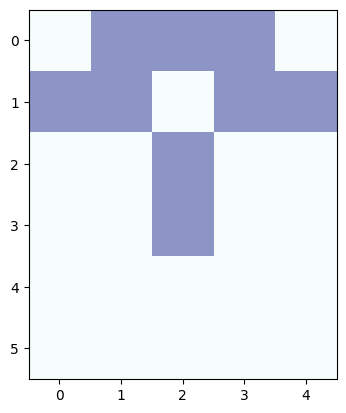

Jogada  3


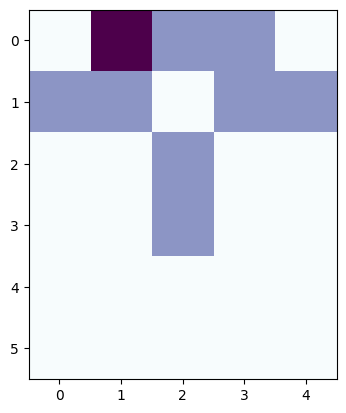

Jogada  3


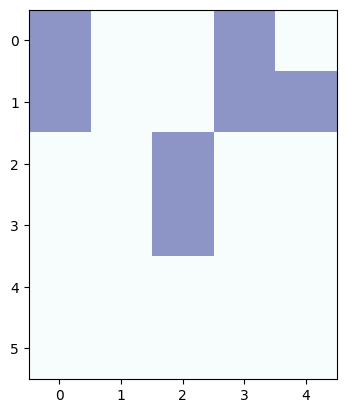

Jogada  4


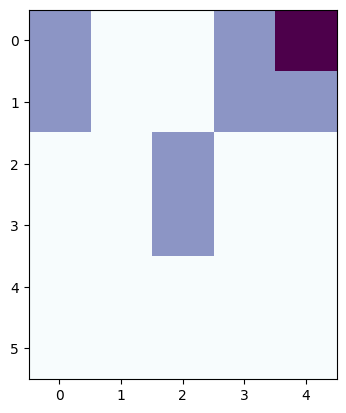

Jogada  4


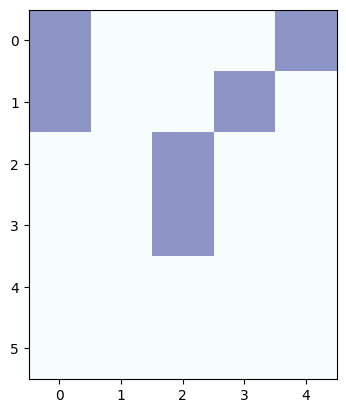

Jogada  5


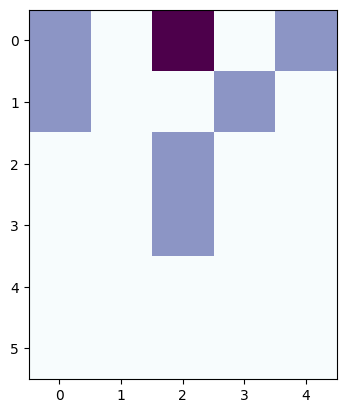

Jogada  5


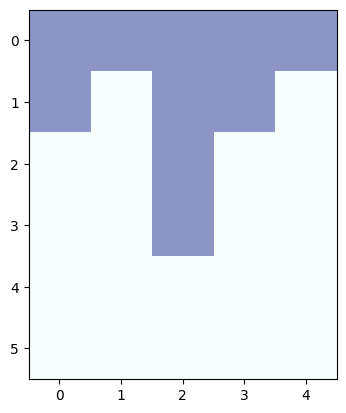

Jogada  6


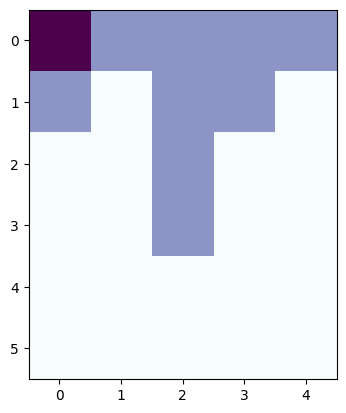

Jogada  6


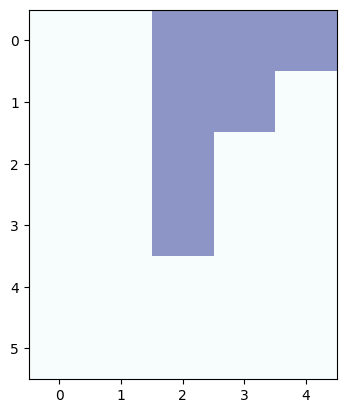

Jogada  7


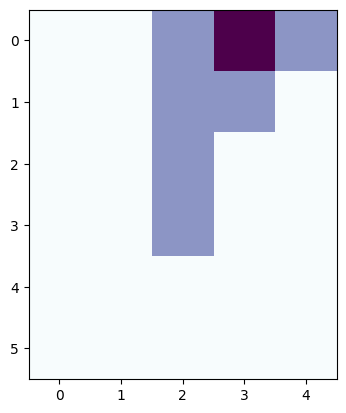

Jogada  7


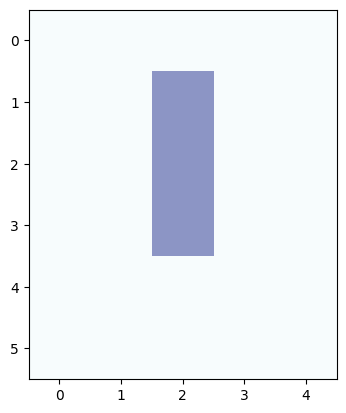

Jogada  8


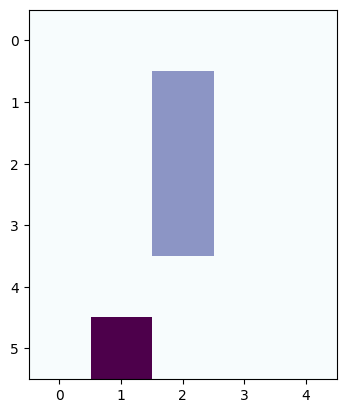

Jogada  8


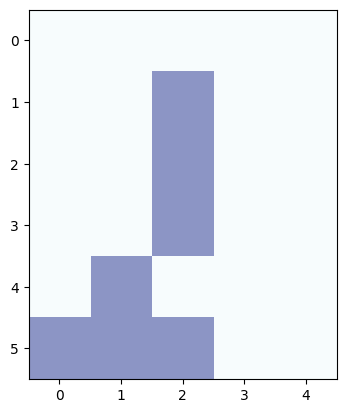

Jogada  9


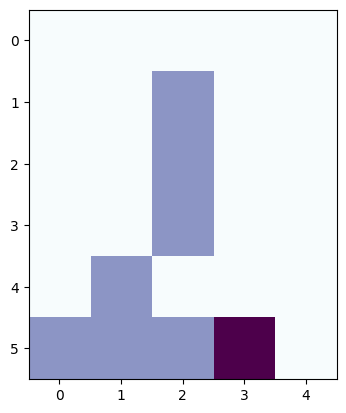

Jogada  9


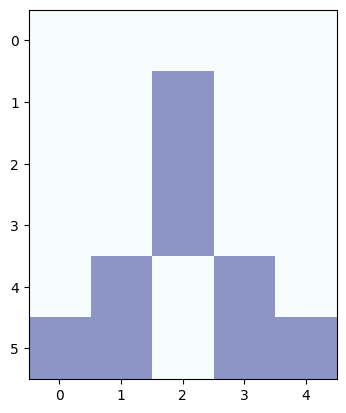

Jogada  10


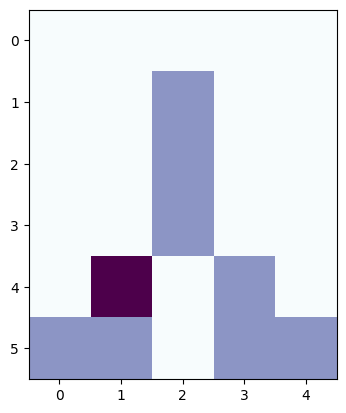

Jogada  10


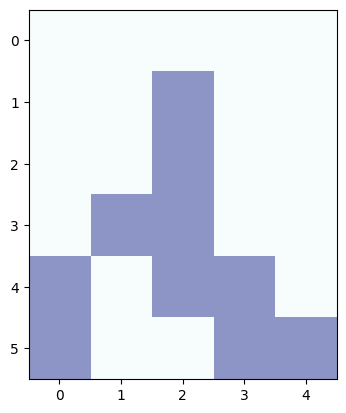

Jogada  11


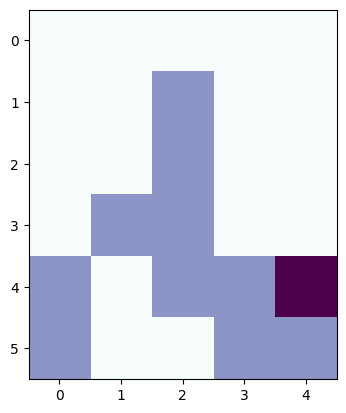

Jogada  11


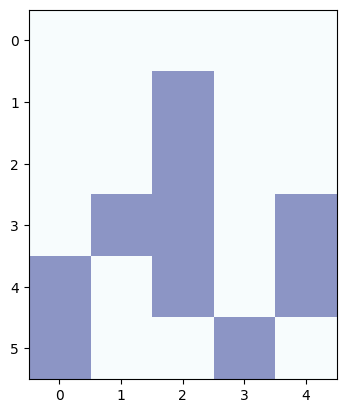

Jogada  12


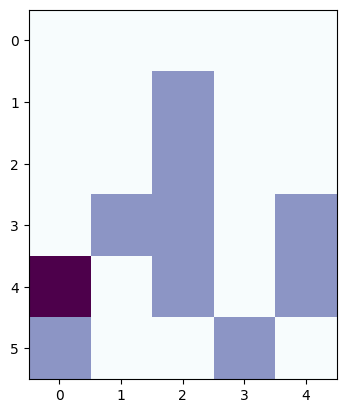

Jogada  12


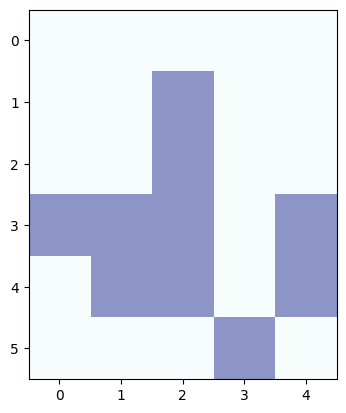

Jogada  13


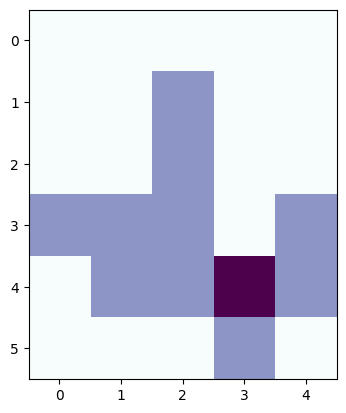

Jogada  13


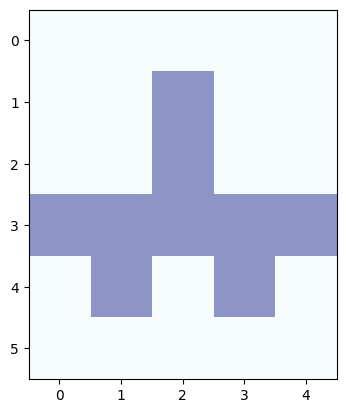

Jogada  14


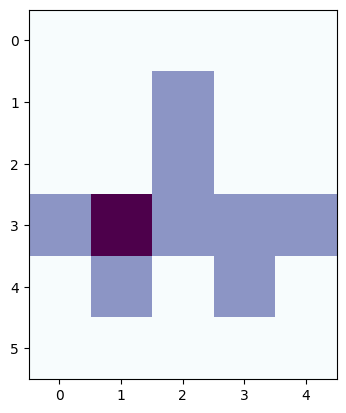

Jogada  14


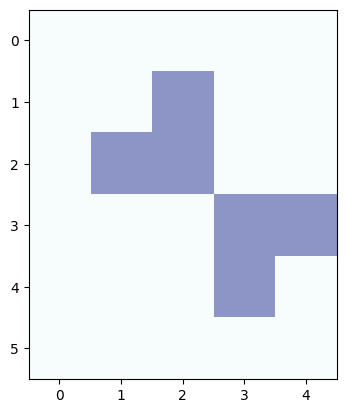

Jogada  15


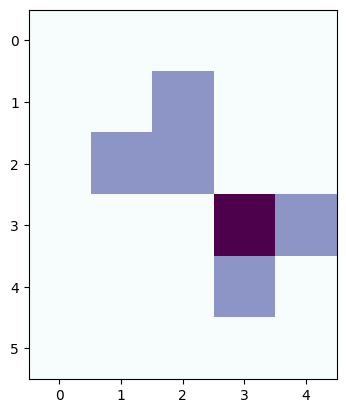

Jogada  15


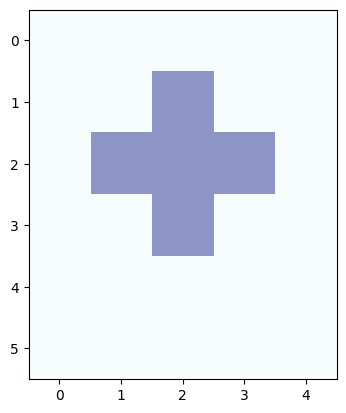

Jogada  16


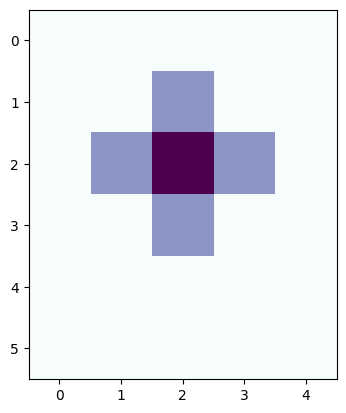

Jogada  16


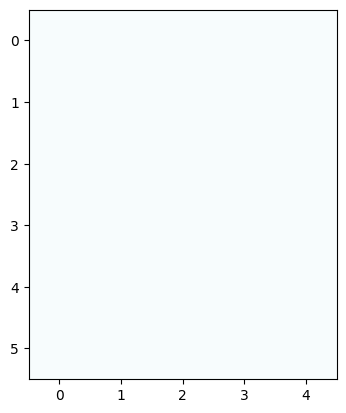

In [24]:
if __name__ == '__main__':

    puzzle = np.array([
        [0,0,1,0,0],
        [0,0,0,0,0],
        [0,1,1,1,0],
        [0,0,1,0,0],
        [0,0,0,0,0],
        [0,0,0,0,0]
    ])

    print("Puzzle original:")
    print(puzzle)
    
    solution = solve_game(puzzle)

    tabuleiro(solution, puzzle)

**Questao 2:** Crie um programa baseado em otimização inteira que resolva (caso possı́vel) qualquer instância de Sudoku. Seu
programa deve receber uma matriz 9 × 9 de entrada, contendo as dicas iniciais do tabuleiro (e valor 0 para as
posições vazias), e fornecer como saı́da esta matriz preenchida conforme as regras do Sudoku caso seja possı́vel.
Teste seu programa com alguns exemplos.

**Resposta:**

Eu modelei o problema do sudoku da seguinte forma: 

\begin{align*}
\text{Minimizar:}& \quad  0 \\
\text{Sujeito a:}& \\
 &\sum_{k=0}^{8} x_{ijk} = 1, \ \forall i,j \in \{0,\dots,8\}  \quad \text{(Cada célula tem um número)} \\
 &\sum_{j=0}^{8} x_{ijk} = 1, \ \forall i,k \in \{0,\dots,8\}  \quad \text{(Números únicos por linha)} \\
 &\sum_{i=0}^{8} x_{ijk} = 1, \ \forall j,k \in \{0,\dots,8\}  \quad \text{(Números únicos por coluna)} \\
 &\sum_{i=3b_r}^{3b_r+2} \sum_{j=3b_c}^{3b_c+2} x_{ijk} = 1, \forall k \in \{0,\dots,8\}, b_r,b_c \in \{0,1,2\}  \quad \text{(Números únicos por bloco)} \\
 &x_{ij(p_{ij}-1)} = 1, \forall i,j : p_{ij} \neq 0 \quad \text{(Valores pré-definidos)} \\
 &x_{ijk} \in \mathbb{B}, \quad \forall i,j,k \in \{0,\dots,8\} \\
\end{align*}


In [3]:
import numpy as np
import cvxpy as cp

def solve_sudoku(puzzle):
    # Cria as variáveis de decisão (9x9x9 binary cube)
    x = cp.Variable((9, 9, 9), boolean=True)
    
    # Define as restrições
    constraints = []
    
    # Cada célula precisa conter exatamente um número
    for i in range(9):
        for j in range(9):
            constraints.append(cp.sum(x[i, j, :]) == 1)
    
    # Cada número aparece exatamente uma vez em cada linha
    for k in range(9):
        for i in range(9):
            constraints.append(cp.sum(x[i, :, k]) == 1)
    
    # Cada número precisa aparecer exatamente uma vez em cada coluna
    for k in range(9):
        for j in range(9):
            constraints.append(cp.sum(x[:, j, k]) == 1)
    
    # Cada número aparece exatamente uma vez em cada bloco 
    for k in range(9):
        for block_row in range(3):
            for block_col in range(3):
                constraints.append(
                    cp.sum(x[block_row*3:(block_row+1)*3, 
                            block_col*3:(block_col+1)*3, k]) == 1
                )
    
    # Precisamos respeitar os valores já pré-estabelecidos
    for i in range(9):
        for j in range(9):
            if puzzle[i, j] != 0:
                k = puzzle[i, j] - 1  # Convertendo para índice 0-based
                constraints.append(x[i, j, k] == 1)
    
    objective = cp.Minimize(0)
    
    # Resolve o problema
    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.SCIP) 
    
    if problem.status == cp.OPTIMAL:
        # Converte a solução para uma matriz 9x9
        solution = np.zeros((9, 9), dtype=int)
        for i in range(9):
            for j in range(9):
                for k in range(9):
                    if np.isclose(x[i, j, k].value, 1.0):
                        solution[i, j] = k + 1  # muda de 1 a 9
        return solution
    else:
        return None

if __name__ == "__main__":
    puzzle = np.array([
        [9, 0, 2, 4, 1, 5, 0, 0, 0],
        [0, 0, 5, 0, 6, 0, 0, 0, 0],
        [3, 7, 0, 0, 0, 0, 0, 6, 1],
        [2, 1, 0, 3, 9, 6, 0, 0, 5],
        [4, 0, 6, 0, 0, 0, 0, 0, 2],
        [0, 0, 3, 0, 8, 0, 1, 9, 0],
        [6, 4, 9, 0, 3, 1, 0, 5, 7],
        [5, 0, 0, 6, 0, 0, 0, 0, 4],
        [8, 0, 7, 5, 0, 9, 0, 0, 0]
    ])
    
    print("Puzzle original:")
    print(puzzle)
    
    solution = solve_sudoku(puzzle)
    
    if solution is not None:
        print("\nSolução encontrada:")
        print(solution)
    else:
        print("\nNão foi encontrada solução para o puzzle.")

Puzzle original:
[[9 0 2 4 1 5 0 0 0]
 [0 0 5 0 6 0 0 0 0]
 [3 7 0 0 0 0 0 6 1]
 [2 1 0 3 9 6 0 0 5]
 [4 0 6 0 0 0 0 0 2]
 [0 0 3 0 8 0 1 9 0]
 [6 4 9 0 3 1 0 5 7]
 [5 0 0 6 0 0 0 0 4]
 [8 0 7 5 0 9 0 0 0]]

Solução encontrada:
[[9 6 2 4 1 5 3 7 8]
 [1 8 5 7 6 3 4 2 9]
 [3 7 4 9 2 8 5 6 1]
 [2 1 8 3 9 6 7 4 5]
 [4 9 6 1 5 7 8 3 2]
 [7 5 3 2 8 4 1 9 6]
 [6 4 9 8 3 1 2 5 7]
 [5 3 1 6 7 2 9 8 4]
 [8 2 7 5 4 9 6 1 3]]


**Questão 3: (SENHA)** Duas crianças brincam com o seguinte jogo: uma delas deve abrir um cadeado com uma senha de
três dı́gitos distintos e a outra dá cinco dicas de senha suficientes para que o código seja descoberto, conforme ilus-
trado na Figura 3. Tomando este exemplo como base, construa um modelo e um programa baseados em otimização
inteira que resolva este problema. O que aconteceria se as dicas não forem suficientes? O que aconteceria se as dicas
forem conflitantes? Crie um exemplo para cada caso e verifique como o seu programa se comporta.

**Resposta:**

Modelei o problema da seguinte forma: 

\begin{align*}
\text{Minimizar:} & \quad 0  \\
\text{Sujeito a:} &  \\
&\sum_{j=0}^{9} x_{ij} = 1, \ \forall i \in \{0,1,2\} \quad \ \text{(Um dígito por posição)} \\
&\sum_{i=0}^{2} \sum_{j=0}^{2} x_{i,t_{k,j}} = c_k, \ \forall k \in \{1,\dots,5\} \quad \text{(Dígitos corretos)} \\
&\sum_{i=0}^{2} x_{i,t_{k,i}} = p_k, \ \forall k \in \{1,\dots,5\} \quad \text{(Posições corretas)} \\
\text{Onde:} &  \\
&  t_k = [t_{k,0}, t_{k,1}, t_{k,2}]  \quad \text{(Dígitos da tentativa $k$)} \\
&  (c_k, p_k)  \quad \text{(Resposta da tentativa $k$)} \\
&  x_{ij} = 1 \iff \ \text{dígito $j$ na posição $i$}  \\
& x_{ij} \in \mathbb{B},  i \in \{0,1,2\}, j \in \{0,\dots,9\} \\
\end{align*}

A ideia aqui é que a cada tentativa vamos adicionando mais restrições, se eu tenho a dica de que existe um digito na posição correta, eu represento isso como "alguma(s) das variaveis que representam os $x_{i,j}$ daquela configuração esta correta", 
já no caso em que temos apenas os digitos corretos, somamos todas as possibilidades que podem estar corretas (a combinação das variáveis que representam aqueles digitos). 

Para o caso em que as dicas não suficiente, ele ainda acaba encontrando algum resultado que satisfaça as equações, convergindo para algum solução possível.  Já no cao em que as dicas são conflitantes, temos uma resposta "infeasible" do status do programa.

In [33]:
import cvxpy as cp
import numpy as np

def resolver_cadeado(dicas):
    # Definindo o problema do cadeado
    digitos = 10  # dígitos de 0 a 9
    # Variáveis de decisão
    X = cp.Variable((3, digitos), boolean=True, name='x')  # X[i,j] = 1 se dígito j está na posição i

    # Restrições
    constraints = []

    # Cada posição tem exatamente um dígito
    for i in range(3):
        constraints.append(cp.sum(X[i,:]) == 1)

    # Restrições das dicas
    for tentativa, (corretos, pos_corretas) in dicas:
        # Dígitos corretos (em qualquer posição)
        corretos_any_pos = cp.sum([cp.sum(X[:,tentativa[i]]) for i in range(3)])
        constraints.append(corretos_any_pos == corretos)
        
        # Dígitos na posição correta
        corretos_pos = cp.sum([X[i,tentativa[i]] for i in range(3)])
        constraints.append(corretos_pos == pos_corretas)

    # Função objetivo (não há objetivo real, que nem na vida, queremos apenas satisfazer as restrições)
    objective = cp.Minimize(0)
    #print([str(c) for c in constraints])
    # Resolver o problema
    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.SCIP)

    print(f"Status da solução: {problem.status}")

    return problem, X


In [34]:
if __name__ == '__main__':
    senha = [1, 5, 3]  # senha verdadeira (exemplo)

    # Dicas fornecidas (cada dica é uma tentativa com [A,B,C] e resposta (corretos, posição correta))
    dicas = [
        ([7, 9, 3], (1, 1)),  
        ([7, 2, 5], (1, 0)),  
        ([3, 1, 7], (2, 0)),  
        ([8, 4, 9], (0, 0)),   
        ([8, 9, 1], (1, 0))   
    ]

    problem, X = resolver_cadeado(dicas)

    # Mostrar a solução
    if problem.status == 'optimal':
        solucao = [int(np.argmax(X[i].value)) for i in range(3)]
        print("Senha encontrada:", solucao)
    else:
        print("Não foi possível encontrar uma senha que satisfaça todas as dicas.")

Status da solução: optimal
Senha encontrada: [1, 5, 3]


In [35]:
""" 
   Exemplo em que as dicas são insuficientes
"""
if __name__ == '__main__':
    dicas = [
        ([7, 9, 3], (1, 1)),  
    ]

    problem, X = resolver_cadeado(dicas)

    # Mostrar a solução
    if problem.status == 'optimal':
        solucao = [int(np.argmax(X[i].value)) for i in range(3)]
        print("Senha encontrada:", solucao)
    else:
        print("Não foi possível encontrar uma senha que satisfaça todas as dicas.")

Status da solução: optimal
Senha encontrada: [0, 0, 3]


In [36]:
""" 
   Exemplo em que as dicas são contraditórias
"""
if __name__ == '__main__':
    dicas = [
        ([7, 9, 3], (3, 3)),  
        ([5, 6, 7], (3, 3)),  
    ]

    problem, X = resolver_cadeado(dicas)

    # Mostrar a solução
    if problem.status == 'optimal':
        solucao = [int(np.argmax(X[i].value)) for i in range(3)]
        print("Senha encontrada:", solucao)
    else:
        print("Não foi possível encontrar uma senha que satisfaça todas as dicas.")

Status da solução: infeasible
Não foi possível encontrar uma senha que satisfaça todas as dicas.


**Questão 4: (Oito Rainhas)** Construa um programa baseado em otimização interia que resolva, se possı́vel, qualquer instância desse problema. Seu programa deve receber, como entrada, uma matriz 8x8 com elementos unitários ou nulos. Entradas iguais a 1
indicam posições previamente definidas de rainhas no tabuleiro; entradas nulas indicam posições livres.
A saı́da do seu programa deve ser uma matriz 8x8 com valor 1 nas posições em que as rainhas foram colocadas,
respeitando as condições do problema. Caso não exista solução viável, seu programa deve indicar isso. Teste
seu programa com alguns exemplos. Crie exemplos em que não há solução viável e verifique o resultado do seu
programa.

**Resposta:** 

O problema das oito rainhas pode ser resolvido com a seguinte modelagem: 

\begin{align*}
\text{Minimizar:} & \quad 0  \\
\text{Sujeito a:} &  \\
&  x_{ij} = 1,  \forall (i,j) \in P \quad \text{(Rainhas pré-definidas)} \\
& x_{ij} \leq 1,  \forall (i,j) \notin P \\
& \sum_{i=0}^7 \sum_{j=0}^7 x_{ij} = 8 \quad \text{(Total de rainhas)} \\
& \sum_{j=0}^7 x_{ij} \leq 1, \ \forall i \in \{0,\dots,7\} \quad \text{(Restrição de linha)} \\
& \sum_{i=0}^7 x_{ij} \leq 1, \ \forall j \in \{0,\dots,7\} \quad \text{(Restrição de coluna)} \\
& \sum_{(i,j) \in D_k} x_{ij} \leq 1, \ \forall k \in \{-7,\dots,7\} \quad \text{(Diagonais principais)} \\
& \sum_{(i,j) \in S_k} x_{ij} \leq 1, \ \forall k \in \{0,\dots,14\} \quad \text{(Diagonais secundárias)} \\
\text{Onde:} &  \\
&  P = \{(i,j) \mid \text{predefined\_board}[i,j] = 1\} \quad \text{(Posições fixas)} \\
&  D_k = \{(i,j) \mid j = i + k,\; 0 \leq i,j \leq 7\} \quad \text{(Diagonais principais)} \\
&  S_k = \{(i,j) \mid j = k - i + 7,\; 0 \leq i,j \leq 7\} \quad \text{(Diagonais secundárias)} \\
& x_{ij} \in \mathcal{B}, \quad i,j \in \{0,\dots,7\} \\
\end{align*}


In [41]:
import cvxpy as cp
import numpy as np

def solve_queens_puzzle(predefined_board):
    # Variável de decisão: matriz 8x8 binária (rainhas adicionais)
    queens = cp.Variable((8, 8), boolean=True)
    
    # Restrições
    constraints = []
    
    # Respeitamos as rainhas pré-definidas
    for i in range(8):
        for j in range(8):
            if predefined_board[i, j] == 1:
                constraints.append(queens[i, j] == 1)
            else:
                constraints.append(queens[i, j] <= 1)  # Pode ser 0 ou 1
    
    # temos que ter exatamente 8 rainhas no total
    constraints.append(cp.sum(queens) == 8)
    
    # e no máximo uma rainha por linha
    for i in range(8):
        constraints.append(cp.sum(queens[i, :]) <= 1)
    
    # assim como no máximo uma rainha por coluna
    for j in range(8):
        constraints.append(cp.sum(queens[:, j]) <= 1)
    
    # No máximo uma rainha por diagonal
    for k in range(-7, 8):
        # Diagonal principal
        diag_main = []
        for i in range(8):
            j = i + k
            if 0 <= j < 8:
                diag_main.append(queens[i, j])
        if diag_main:
            constraints.append(cp.sum(diag_main) <= 1)
        
        # Diagonal secundária
        diag_sec = []
        for i in range(8):
            j = k - i + 7
            if 0 <= j < 8:
                diag_sec.append(queens[i, j])
        if diag_sec:
            constraints.append(cp.sum(diag_sec) <= 1)
    
    # funcao objetivo dummy
    problem = cp.Problem(cp.Minimize(0), constraints)
    problem.solve(solver=cp.SCIP)
    
    if problem.status == cp.OPTIMAL:
        solution = np.round(queens.value).astype(int)
        return solution
    else:
        print("Não existe solução para o tabuleiro fornecido.")
        return None

def print_board(board):
    """Imprime o tabuleiro de forma visual."""
    for row in board:
        print(" ".join("Q" if cell == 1 else "." for cell in row))

In [42]:
def check_solution_validity(solution, example_board):
    if solution is not None:
        print("\nSolução encontrada:")
        print_board(solution)
        
        # Verificação
        print("\nVerificando a solução...")
        valid = True
        
        # Verifica total de rainhas
        if np.sum(solution) != 8:
            print(f"Erro: Número incorreto de rainhas ({np.sum(solution)})")
            valid = False
        
        # Verifica rainhas pré-definidas
        for i in range(8):
            for j in range(8):
                if example_board[i,j] == 1 and solution[i,j] != 1:
                    print(f"Erro: Rainha fixa em ({i},{j}) foi removida")
                    valid = False
        
        # Verifica linhas, colunas e diagonais
        for i in range(8):
            if np.sum(solution[i,:]) > 1:
                print(f"Erro: Múltiplas rainhas na linha {i}")
                valid = False
        
        for j in range(8):
            if np.sum(solution[:,j]) > 1:
                print(f"Erro: Múltiplas rainhas na coluna {j}")
                valid = False
        
        for k in range(-7, 8):
            # Diagonal principal
            diag_main = []
            for i in range(8):
                j = i + k
                if 0 <= j < 8:
                    diag_main.append(solution[i,j])
            if sum(diag_main) > 1:
                print(f"Erro: Múltiplas rainhas na diagonal principal com k={k}")
                valid = False
            
            # Diagonal secundária
            diag_sec = []
            for i in range(8):
                j = k - i + 7
                if 0 <= j < 8:
                    diag_sec.append(solution[i,j])
            if sum(diag_sec) > 1:
                print(f"Erro: Múltiplas rainhas na diagonal secundária com k={k}")
                valid = False
        
        if valid:
            print("A solução é válida!")
    else:
        print("Não foi encontrada solução para o tabuleiro fornecido.")

In [43]:
if __name__ == "__main__":
    # Exemplo de tabuleiro com rainhas pré-definidas
    example_board = np.array([
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],  # Rainha fixa no centro
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])
    
    print("Tabuleiro inicial (Q = rainha fixa):")
    print_board(np.where(example_board == 1, 1, 0))
    
    solution = solve_queens_puzzle(example_board)

    check_solution_validity(solution, example_board)
    
    

Tabuleiro inicial (Q = rainha fixa):
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . Q . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .

Solução encontrada:
. Q . . . . . .
. . . . Q . . .
. . . . . . Q .
. . . Q . . . .
Q . . . . . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .

Verificando a solução...
A solução é válida!


In [44]:
if __name__ == "__main__":
    # Exemplo de tabuleiro com rainhas pré-definidas
    example_board = np.array([
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],  # Rainha fixa no centro
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])
    
    print("Tabuleiro inicial (Q = rainha fixa):")
    print_board(np.where(example_board == 1, 1, 0))
    
    solution = solve_queens_puzzle(example_board)

    check_solution_validity(solution, example_board)

Tabuleiro inicial (Q = rainha fixa):
. . . . . . . .
. . . . . . Q .
. . . . . . . .
. . . Q . . . .
. . . . . . . .
. . . . . . . .
. . . . . Q . .
. . . . . . . .

Solução encontrada:
. . . . Q . . .
. . . . . . Q .
Q . . . . . . .
. . . Q . . . .
. Q . . . . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .

Verificando a solução...
A solução é válida!


In [46]:
""" 
    Exemplo inconsistente
"""

if __name__ == "__main__":
    # Exemplo de tabuleiro com rainhas pré-definidas
    example_board = np.array([
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],  # Rainha fixa no centro
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])
    
    print("Tabuleiro inicial (Q = rainha fixa):")
    print_board(np.where(example_board == 1, 1, 0))
    
    solution = solve_queens_puzzle(example_board)

    check_solution_validity(solution, example_board)

Tabuleiro inicial (Q = rainha fixa):
. . . . . . . .
. . . . . . Q .
. . . . . . . .
. . . Q Q . . .
. . . . . . . .
. . . . . . . .
. . . . . Q . .
. . . . . . . .
Não existe solução para o tabuleiro fornecido.
Não foi encontrada solução para o tabuleiro fornecido.
